# ENFICC - Taller 1

## Esteban Garcia Leaño - 201326495


## Introduccion

   Si bien se encuentran numerosas aplicaciones en ámbitos de ingeniería para el tratamiento de datos en la cotidianidad, en este caso, es de particular interés la estimación de la radiación solar en ciertas ciudades de Colombia para estimar si es o no conveniente la implementación de sistemas de recolección de energía solar.

   Así, siguiendo la resolución CREG 201 de 2017 que definió la metodología para el cálculo de la Energía en Firme para el Cargo por Confiabilidad - ENFICC, se pretende ajustar datos de radiación adquiridos de sistemas satelitales a datos tomados en los puntos de interés sobre tierra para así poder cumplir con el requerimiento de contar con series de datos con más de 10 años para un mismo lugar.
   
   Para lograrlo se crearon funciones que permitan extraer y analizar datos de radiación local provenientes de archivos .csv.
   
### Objetivo Principal
* El presente taller tiene como objetivo familiarizar al estudiante con herramientas computacionales como lo es python en la utilización de bases de datos en formatos .csv.

### Objetivo Especifico
* Encontrar la Energía en Firme para el Cargo por Confiabilidad - ENFICC a partir de datos satelitales ajustados por medio del metodo MCP y ver su proximidad a esta misma medición para datos tomados en tierra por el IDEAM.

   
## Requerimientos del taller
1. Implementar una función para el cálculo de la ENFICC. La entrada a dicha función es una serie de 10 años en resolución          horaria y la salida debe ser la ENFICC 99%, es decir la energía que se espera se puede superar el 99% del tiempo.

* Implementar una función que permita graficar la distribución de energía (Figura 38 del protocolo) y comparar entre diferentes series. La entrada corresponde a las diferentes series de 10 años en resolución horaria y la salida debe una gráfica similar a la mostrada en el documento.

* Implementar una función para la Metodología Medición-Correlación-Predicción (MCP) basada en la relación de varianzas planteada en la sección 3.1.4 del protocolo. La entrada a la función es la serie de corto plazo medida en sitio (OBJ) y la serie secundaría basada en información satelital correspondiente a 10 años de medición (REF). La salida debe corresponder a la serie de largo plazo (10 año, resolución horaria) ajustada siguiendo la metodología MCP.

* Implemente funciones para el cálculo de los indicadores de error planteados en la sección 3.1.2 del protocolo, error RMS (RMSEn), error de sesgo medio (MBE) y Indice de Kolmogorov-Smagorinski (KSI%), la entrada a estas funciones son dos series de largo plazo (10 años y resolución horaria) y la salida el indicador de error dado.

* Analice la eficacia del método MCP - relación de varianzas para reducir los indicadores de error y el error en la ENFICC para series de tiempo de diferentes localizaciones en el territorio nacional. Analice el efecto de la longitud de la series de tiempo medida en sitio (OBJ) y el año utilizado. Comente sus hayazgos y complete su análisis con gráficas de buena calidad.

* El informe debe ser entregado en formato Jupyter Notebook a más tardar el día viernes 16 de febrero antes de las 17:00. La entrega se hace a través de un enlace a su cuaderno en Github a través de la plataforma Sicua+.


***

In [1308]:
# Importando librerias

import os
import pandas as pd
from IPython.display import Image

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1309]:
pwd

'/home/nbuser/library/02_Taller1_EFICC'

***

## IDEAM - Toma de radiación en tierra

A partir de datos aportados por el IDEAM de mediciones en tierra en resolución horaria, se crearon las funciones a continuación para una ciudad de interés y así ver la radiación local normalizada promedio graficada en periodos mensuales.

In [1310]:
# Extracción de datos de archivo .csv

base_dir_IDEAM = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad_IDEAM = 'Cali'
fuente = 'IDEAM'
serie_csv_IDEAM = os.path.join(base_dir_IDEAM,ciudad_IDEAM,fuente+'.csv')
serie_pd_IDEAM = pd.read_csv(serie_csv_IDEAM, sep = ';', encoding='latin-1')

In [1311]:
# Funciones para organizar datos extraidos en diferentes resoluciones (mensual y diaria)

def ghi_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes))
                                         ,"DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[(
                (serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes)),
                "GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

In [1312]:
# Utilización de funciones antes definidas para reorganizar Datos en resolución horaria en resoluciones diaria y mensual

ghi_mensual_loc_IDEAM = ghi_mensual(serie_pd_IDEAM)
ghi_diario_loc_IDEAM = ghi_dia(ghi_mensual_loc_IDEAM)
datos_IDEAM = sorted(ghi_diario_loc_IDEAM["GHIdiario"])

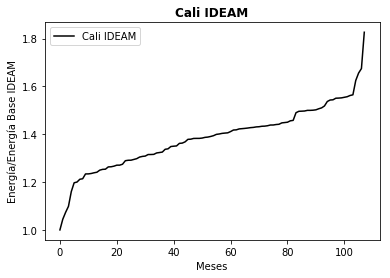

In [1313]:
# Grafica de energía normalizada contra timepo en meses

pylab.xlabel("Meses")
pylab.ylabel("Energía/Energía Base IDEAM")
pylab.title(ciudad_IDEAM+' IDEAM',fontweight="bold")
numdatos = range(len(datos_IDEAM))
pylab.plot(numdatos,datos_IDEAM/datos_IDEAM[0],'-k', label=ciudad_IDEAM+' IDEAM')
pylab.legend(loc='upper left')
pylab.savefig(os.path.join(output_dir, ciudad_IDEAM+'_IDEAM.png'), dpi=600)

***

## Gráficas de GHI a partir de IDEAM

A continuación se presentan las gráfica, para cuatro ciudades diferentes, del GHI empleando el código inmediatamente anterior.

<img src="output/Cali_IDEAM.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 1. GHI local de Cali según IDEAM</div>

<img src="output/Carmendebolivar_IDEAM.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 2. GHI local de Carmen de Bolivar según IDEAM</div>

<img src="output/Medellin_IDEAM.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 3. GHI local de Medellin según IDEAM</div>

<img src="output/Uribia_IDEAM.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 4. GHI local de Uribia según IDEAM</div>

***

## NREL - Datos Satelitales

In [1314]:
# Extracción de datos de archivo .csv

base_dir_NREL = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad_NREL = 'Cali'
fuente = 'NREL'
serie_csv_NREL = os.path.join(base_dir_NREL,ciudad_NREL,fuente+'.csv')
serie_pd_NREL = pd.read_csv(serie_csv_NREL, sep = ';', encoding='latin-1')

In [1315]:
# Utilización de funciones antes definidas para reorganizar Datos en resolución horaria en resoluciones diaria y mensual

ghi_mensual_loc_NREL = ghi_mensual(serie_pd_NREL)
ghi_diario_loc_NREL = ghi_dia(ghi_mensual_loc_NREL)
datos_NREL = sorted(ghi_diario_loc_NREL["GHIdiario"])

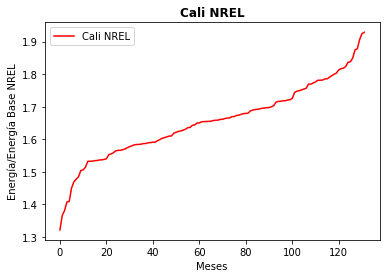

In [1316]:
# Grafica de energía normalizada contra timepo en meses

pylab.xlabel("Meses")
pylab.ylabel("Energía/Energía Base NREL")
pylab.title(ciudad_IDEAM+' NREL',fontweight="bold")
numdatos = range(len(datos_NREL))
pylab.plot(numdatos,datos_NREL/datos_IDEAM[0],'-r', label=ciudad_NREL+' NREL')
pylab.legend(loc='upper left')
pylab.savefig(os.path.join(output_dir,ciudad_NREL+'_NREL.png'), dpi=600)

***

## Gráficas de GHI a partir de datos satelitales (NREL)

A continuación se presentan las gráfica, para cuatro ciudades diferente, del GHI empleando el código inmediatamente anterior.

<img src="output/Cali_NREL.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 5. GHI local de Cali según datos satelitales</div>

<img src="output/Carmendebolivar_NREL.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 6. GHI local de Carmen de Bolivar según datos satelitales</div>

<img src="output/Medellin_NREL.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 7. GHI local de Medellin según datos satelitales</div>

<img src="output/Uribia_NREL.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 8. GHI local de Uriba según datos satelitales</div>

***

## Comparación de GHI entre IDEAM y NREL

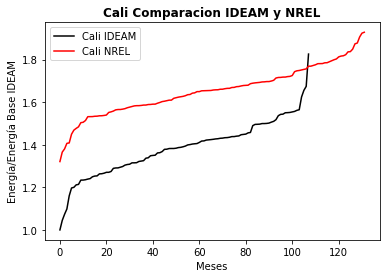

In [1317]:
pylab.xlabel("Meses")
pylab.ylabel("Energía/Energía Base IDEAM")
pylab.title(ciudad_IDEAM+' Comparacion IDEAM y NREL',fontweight="bold")
numdatos1 = range(len(datos_IDEAM))
pylab.plot(numdatos1,datos_IDEAM/datos_IDEAM[0],'-k', label= ciudad_IDEAM+' IDEAM')
numdatos2 = range(len(datos_NREL))
pylab.plot(numdatos2,datos_NREL/datos_IDEAM[0],'-r', label= ciudad_NREL+' NREL')
pylab.legend(loc='upper left')
pylab.savefig(os.path.join(output_dir, ciudad_IDEAM+'_IDEAM_vs_'+ciudad_NREL+'_NREL.png'), dpi=600)

***

## Gráficas de GHI comparadas

A continucion se presentan las graficas donde se compara el GHI tomado de IDEAM y de datos satelitales (RNEL).

<img src="output/Cali_IDEAM_vs_Cali_NREL.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 9. GHI local de Cali comparando IDEAM y NREL</div>

<img src="output/Carmendebolivar_IDEAM_vs_Carmendebolivar_NREL.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 10. GHI local de Carmen de Bolivar comparando IDEAM y NREL</div>

<img src="output/Medellin_IDEAM_vs_Medellin_NREL.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 11. GHI local de Medellin comparando IDEAM y NREL</div>

<img src="output/Uribia_IDEAM_vs_Uribia_NREL.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 12. GHI local de Uribia comparando IDEAM y NREL</div>

***

## Ajuste de NREL a IDEAM según elección temporal

A continuación, se pretende ajustar los datos de NREL a los datos de IDEAM por medio del método MCP tomando como parámetros de ajuste lapsos de 3, 6 y 9 meses para un mismo año.

En este caso los tres lapsos se tomaron arbitrariamente como sigue:

|Año  |# Meses|Segemento de meses |
|-----|-------|:-----------------:|
|2010 |3      |1 a 3              |
|2010 |6      |2 a 7              |
|2010 |9      |3 a 11             |
<div style="text-align: center;"> **Tabla 1. Seleccion de lapsos**</div>

La fórmula empleada MCP es:

<div style="text-align: center;"> $\hat{y}=(\mu_y-(\sigma_y/\sigma_x)\mu _x)+(\sigma_y/\sigma_x)x$ </div>

Donde:

$\hat{y}$ = NREL ajustados

$\mu_y$ = Media IDEAM

$\mu_X$ = Media NREL

$\sigma_y$ = Desviación estandar de IDEAM

$\sigma_x$ = Desviación estandar de NREL

$x$ = Datos de NREL

In [1330]:
# Para sacar datos de una matriz antes definida para un año y mes(es) especificos.

agno_int=2010
mes_in_int=3
mes_fin_int=11

datos_de_interes_IDEAM_df=serie_pd_IDEAM[(serie_pd_IDEAM["AÑO"]==agno_int) 
                                         & (serie_pd_IDEAM["MES"]>=mes_in_int) & (serie_pd_IDEAM["MES"]<=mes_fin_int)]

datos_de_interes_NREL_df=serie_pd_NREL[(serie_pd_NREL["AÑO"]==agno_int) 
                                       & (serie_pd_NREL["MES"]>=mes_in_int) & (serie_pd_NREL["MES"]<=mes_fin_int)]

In [1331]:
# Calculo de la media de los datos de interes

media_IDEAM=datos_de_interes_IDEAM_df.loc[:,"IDEAM"].mean()
media_NREL=datos_de_interes_NREL_df.loc[:,"NREL"].mean()


In [1332]:
# Funcion de calculo de la desviacion estandar

def ghi_desv(datos_ghi, prom):
    suma=0
    for dato in datos_ghi:
        suma += (float(dato)- prom)**2
    desv = sqrt(float(suma)/(len(datos_ghi)-1))
    return desv

In [1333]:
# Calculo de DESVIACION ESTANDAR
desv_IDEAM=ghi_desv(datos_de_interes_IDEAM_df.loc[:,"IDEAM"], media_IDEAM)
desv_NREL=ghi_desv(datos_de_interes_NREL_df.loc[:,"NREL"], media_NREL)

In [1334]:
# Estimacion de los datos corregidos que contiene numeros negativos.
est= (media_IDEAM-((desv_IDEAM/desv_NREL)*media_NREL))+((desv_IDEAM/desv_NREL)*(serie_pd_NREL.loc[:,"NREL"]))

# Correccion de los datos negativos presentes en los datos corregidos.
est[est < 0] = 0

In [1335]:
# Asigancion de datos GHI ajustados a nueva matriz mod

serie_pd_NREL_mod=serie_pd_NREL.copy()

serie_pd_NREL_mod["NREL"]=est

datos_de_interes_NREL_mod_df=serie_pd_NREL[(serie_pd_NREL["AÑO"]==agno_int) 
                                           & (serie_pd_NREL["MES"]>=mes_in_int) & (serie_pd_NREL["MES"]<=mes_fin_int)]

In [1336]:
# Utilización de funciones antes definidas para reorganizar Datos en resolución horaria en resoluciones diaria y mensual

ghi_mensual_loc_NREL_mod = ghi_mensual(serie_pd_NREL_mod)
ghi_diario_loc_NREL_mod = ghi_dia(ghi_mensual_loc_NREL_mod)
datos_NREL_mod = sorted(ghi_diario_loc_NREL_mod["GHIdiario"])

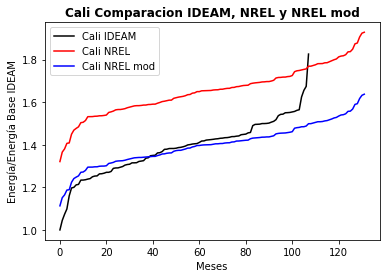

In [1337]:
pylab.xlabel("Meses")
pylab.ylabel("Energía/Energía Base IDEAM")
pylab.title(ciudad_IDEAM+' Comparacion IDEAM, NREL y NREL mod',fontweight="bold")

numdatos1 = range(len(datos_IDEAM))
pylab.plot(numdatos1,datos_IDEAM/datos_IDEAM[0],'-k', label= ciudad_IDEAM+' IDEAM')

numdatos2 = range(len(datos_NREL))
pylab.plot(numdatos2,datos_NREL/datos_IDEAM[0],'-r', label= ciudad_NREL+' NREL')

numdatos3 = range(len(datos_NREL_mod))
pylab.plot(numdatos3,datos_NREL_mod/datos_IDEAM[0],'-b', label= ciudad_IDEAM+' NREL mod')
pylab.legend(loc='upper left')

pylab.savefig(os.path.join(output_dir, ciudad_IDEAM+'_IDEAM_vs_'+ciudad_NREL+'_NREL_mod_3.png'), dpi=600)

A continucion se presenta la grafica anterior para tres ciudades diferentes para 3 lapsos de tiempo diferentes.

***

### Cali

<img src="output/Cali_IDEAM_vs_Cali_NREL_mod.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 13. GHI local de Cali comparando IDEAM, NREL y NREL mod para 3 meses</div>

<img src="output/Cali_IDEAM_vs_Cali_NREL_mod_2.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 14. GHI local de Cali comparando IDEAM, NREL y NREL mod para 6 meses</div>

<img src="output/Cali_IDEAM_vs_Cali_NREL_mod_3.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 15. GHI local de Cali comparando IDEAM, NREL y NREL mod para 9 meses</div>

***

### Carmen de Bolivar

<img src="output/Carmendebolivar_IDEAM_vs_Carmendebolivar_NREL_mod.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 16. GHI local de Carmen de Bolivar comparando IDEAM, NREL y NREL mod para 3 meses</div>

<img src="output/Carmendebolivar_IDEAM_vs_Carmendebolivar_NREL_mod_2.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 17. GHI local de Carmen de Bolivar comparando IDEAM, NREL y NREL mod para 6 meses</div>

<img src="output/Carmendebolivar_IDEAM_vs_Carmendebolivar_NREL_mod_3.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 18. GHI local de Carmen de Bolivar comparando IDEAM, NREL y NREL mod para 9 meses</div>

***

### Medellin

<img src="output/Medellin_IDEAM_vs_Medellin_NREL_mod.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 19. GHI local de Medellin comparando IDEAM, NREL y NREL mod para 3 meses</div>

<img src="output/Medellin_IDEAM_vs_Medellin_NREL_mod_2.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 20. GHI local de Medellin comparando IDEAM, NREL y NREL mod para 6 meses</div>

<img src="output/Medellin_IDEAM_vs_Medellin_NREL_mod_3.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 21. GHI local de Medellin comparando IDEAM, NREL y NREL mod para 9 meses</div>

***

### Uribia

<img src="output/Uribia_IDEAM_vs_Uribia_NREL_mod.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 22. GHI local de Uribia comparando IDEAM, NREL y NREL mod para 3 meses</div>

<img src="output/Uribia_IDEAM_vs_Uribia_NREL_mod_2.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 23. GHI local de Uribia comparando IDEAM, NREL y NREL mod para 6 meses</div>

<img src="output/Uribia_IDEAM_vs_Uribia_NREL_mod_3.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 24. GHI local de Uribia comparando IDEAM, NREL y NREL mod para 9 meses</div>
 ***

## Calculo del error entre dos series IDEAM-NREL

A continuacion se calcula el error presenta entre los datos de IDEAM y los datos de NREL ajustados.

In [1326]:
# Calculo de RMSEn (Error cuadratico Medio)

def ghi_error_RMSEn(datos_ideam, datos_nrel_mod):
    maxx = max(datos_ideam)
    minn = min(datos_ideam)
    
    error = sqrt(((np.array(datos_ideam)-np.array(datos_nrel_mod))**2).mean())/(maxx-minn)
    return error

# Calculo de MBE (error de sesgo medio)

def ghi_error_MBE(datos_ideam, datos_nrel_mod):
    
    error=((np.array(datos_nrel_mod)-np.array(datos_ideam)).sum())/((np.array(datos_ideam)).sum())
    return error

# Calculo de KSI%

def ghi_error_KSI(datos_ideam, datos_nrel_mod):
    error=ks2test(np.array(datos_ideam), np.array(datos_nrel_mod))
    return error



from scipy.stats import ks_2samp as ks2test
def errores(datos_ideam, datos_nrel):
    maxx = max(datos_ideam)
    minn = min(datos_ideam)
    
    stats_df=pd.DataFrame(columns=["RMSEn","MBE", "KSI"])
    
    error_RMSEn= sqrt(((np.array(datos_ideam)-np.array(datos_nrel))**2).mean())/(maxx-minn)
    error_MBE=((np.array(datos_nrel)-np.array(datos_ideam)).sum())/((np.array(datos_ideam)).sum())
    error_KSI= ks2test(np.array(datos_ideam), np.array(datos_nrel))
    error={"RMSEn":error_RMSEn, "MBE":error_MBE, "KSI":error_KSI[0]}
    stats_df=stats_df.append(error, ignore_index=True)

    print ("Error RMSEn:", error_RMSEn)
    print ("Error MBE:", error_MBE)
    print ("Error KSI:", error_KSI)
    
    return stats_df

In [1327]:
error=errores(datos_de_interes_IDEAM_df.loc[:,"IDEAM"], datos_de_interes_NREL_mod_df.loc[:,"NREL"])

Error RMSEn: 0.138932824054
Error MBE: 0.20764986328
Error KSI: Ks_2sampResult(statistic=0.053333333333333344, pvalue=1.2978720668590104e-08)


## Datos de error

|Ciudad\Tipo de error|RMSEn  |MBE    |KSI    |
|-------------------:|:-----:|:-----:|:-----:|
| Cali               |0.0139 |0.2010 |0.0657 |
| Carmen de Bolivar  |0.1357 |-0.1430|0.0587 |
| Medellin           |0.1834 |0.3364 |0.1116 |
| Uribia             |0.1267 |0.0556 |0.0236 |
<div style="text-align: center;"> **Tabla 2. Tipo de error para lapso de 3 meses** </div>



|Ciudad\Tipo de error|RMSEn  |MBE    |KSI    |
|-------------------:|:-----:|:-----:|:-----:|
| Cali               |0.0139 |0.2009 |0.0548 |
| Carmen de Bolivar  |0.1263 |-0.1338|0.0580 |
| Medellin           |0.1754 |0.2007 |0.0686 |
| Uribia             |0.1262 |0.1110 |0.0483 |
<div style="text-align: center;"> **Tabla 3. Tipo de error para lapso de 6 meses** </div>



|Ciudad\Tipo de error|RMSEn  |MBE    |KSI    |
|-------------------:|:-----:|:-----:|:-----:|
| Cali               |0.0189 |0.2076 |0.0530 |
| Carmen de Bolivar  |0.1212 |-0.0789|0.0400 |
| Medellin           |0.1667 |0.2127 |0.0663 |
| Uribia             |0.1267 |0.1300 |0.0533 |
<div style="text-align: center;"> **Tabla 4. Tipo de error para lapso de 9 meses** </div>

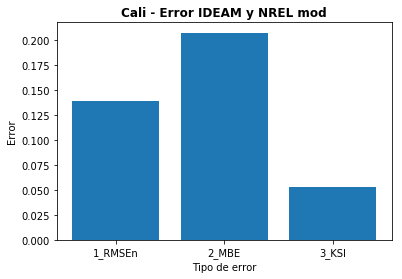

In [1339]:
lable=["1_RMSEn", "2_MBE", "3_KSI"]
plt.xlabel("Tipo de error")
plt.ylabel("Error")
plt.title(ciudad_IDEAM+' - Error IDEAM y NREL mod',fontweight="bold")
datos=(error["RMSEn"], error["MBE"], error["KSI"])
data=np.concatenate(datos)
plt.bar(lable, data)
plt.savefig(os.path.join(output_dir, ciudad_IDEAM+'_error_3.png'), dpi=600)

A continuacion se presentan la grafica anterior para tres ciudades diferentes.

<img src="output/Cali_error.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 25. Error RMSEn, MBE y KSI del GHI local de Cali entre IDEAM y NREL mod</div>

<img src="output/Carmendebolivar_error.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 26. Error RMSEn, MBE y KSI del GHI local de Carmen de Bolivar entre IDEAM y NREL mod</div>

<img src="output/Medellin_error.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 27. Error RMSEn, MBE y KSI del GHI local de Medellin entre IDEAM y NREL mod</div>

<img src="output/Uribia_error.png",width=500, height=200>
##### <div style="text-align: center;">Gráfica 28. Error RMSEn, MBE y KSI del GHI local de Uribia entre IDEAM y NREL mod</div>

## Calculo de la ENFICC

In [1340]:
# 1. Implementar una función para el cálculo de la ENFICC. La entrada a dicha función es una serie de 10 años en resolución 
#    horaria y la salida debe ser la ENFICC 99%, es decir la energía que se espera se puede superar el 99% del tiempo.

percentil = 0.01
enficc = ghi_diario_loc_IDEAM.quantile(q=percentil, numeric_only=True)["GHIdiario"]
print('La ENFICC 99% es: ', enficc)

La ENFICC 99% es:  3.33077931605


## Datos de EFICC
Los datos de ENFICC fueron registrados en las siguiente tabla para diferentes periodos de tiempo.

|      -----         |ENFICC segun numero de meses 3 Meses     |
|--------------------|:---------------------------------------:|
|Ciudad              |3 Meses      |6 Meses      |9 Meses      |
| Cali               |3.33         |3.33         |3.33         |
| Carmen de Bolivar  |4.06         |4.06         |4.06         |
| Medellin           |3.53         |3.53         |3.54         |
| Uribia             |4.28         |4.28         |4.28         |
<div style="text-align: center;">**Tabla 5. ENFICC PARA DIFERENTES LPSOS DE TIEMPO**</div>

## Analisis

Tras la implementación del código anterior se graficó el ajuste de los datos satelitales contra los datos recolectados por IDEAM para tres lapsos de 3, 6 y 9 meses para 4 ciudades en particular, Cali, Carmen de Bolívar, Medellín y Uribia. Así al observar de la Grafica 13 a la Grafica 24 es notorio como los datos corregidos de Carmen de Bolivar sobre estiman en gran medida el GHI, lo cual se puede atribuir al hecho de que los datos IDEAM y NREL se interceptan cerca de la mitad de los datos registrados. De lo anterior podemos decir que el método MCP empleado en este caso no se ajusta del todo bien para casos donde cerca de la mitad de los datos NREL se encuentre por encima y la otra mitad se encuentren por debajo de los datos de IDEAM. Lo anterior se puede verificar al observar las otras tres ciudades, en donde para todos los lapsos de tiempo que se emplearon para el ajuste, la grafica de ajuste (NREL mod) si se acerca bastante a la grafica de IDEAM, o cual nos afirma que el ajuste es correcto y es preciso utilizar dicho ajuste.


También, si se observan las gráficas 22 a 23, los datos de IDEAM de Uribia presentan tendencia lineal, caso el cual muestra el mejor ajuste a los datos de NREL.


Si bien Medellin presenta un ajuste bastante conveniente, en el ajuste hecho con el lapso de 3 meses, presenta un sub estimación en la grafica ajustada, lo cual no es conveniente pero se prefiero por encima del caso de sobre estimación. 


Al analizar las graficas y tablas de error, se ve como al tomar 3. 6 o 9 meses como puntos de partida no se ve un gran cambio en los tipos de error. Tompoco se ve cambios en el calculo de la ENFICC, como lo muestr la tabla 5.

## Conclusion

Tras la realizacion de este taller fue posible implementar un codigo para el calculo de la ENFICC a partir de datos ajustados y compararlos para diferentes periodos de tiempo. A su vez se desarrollaron abilidades nuevas en lo que a programacion en python se refiere. 
Finalmente, de los datos tratados, se puede concluir que el metodo MCP y el calculo de la ENFICC resulta favorable para comportamientos lineanes del clima, tal y como lo muestran las graficas referentes a Uribia.